# Facial Landmark completion using U-Net style CNN

## Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

from model_utility import IMAGE_SIZE, LandmarkCutoutImageIterator

In [2]:
tf.get_logger().setLevel('ERROR')

## Constants

In [3]:
LANDMARKS_CSV_PATH = r'../Dataset/list_landmarks_align_celeba.csv'
RANDOM_STATE = 7
VAL_SPLIT = 0.1
BATCH_SIZE = 32
TRAIN_STEPS = 10_000
VAL_STEPS = 100

## Data Loading

In [4]:
landmark_df = pd.read_csv(LANDMARKS_CSV_PATH)
landmark_df.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [5]:
landmark_df.shape

(202599, 11)

In [6]:
train_df, val_df = train_test_split(landmark_df, test_size = VAL_SPLIT)
train_df.shape, val_df.shape

((182339, 11), (20260, 11))

In [7]:
train_df.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
24801,024802.jpg,69,110,107,112,97,134,75,153,104,152
61979,061980.jpg,68,111,109,112,91,138,68,151,110,152
71571,071572.jpg,69,111,108,112,88,134,71,152,106,151
52480,052481.jpg,69,111,108,112,81,136,71,151,106,153
4715,004716.jpg,70,111,107,110,80,131,72,153,104,153


In [8]:
val_df.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
70687,070688.jpg,69,112,109,111,88,138,65,152,111,151
93844,093845.jpg,71,110,106,111,89,125,74,153,104,153
72167,072168.jpg,69,112,109,111,88,142,71,152,106,151
60230,060231.jpg,70,111,107,110,82,136,72,152,103,153
135512,135513.jpg,70,110,106,111,79,136,74,152,104,154


In [9]:
train_ds = LandmarkCutoutImageIterator(train_df, BATCH_SIZE, TRAIN_STEPS)
val_ds = LandmarkCutoutImageIterator(val_df, BATCH_SIZE, VAL_STEPS)

train_ds, val_ds

(<model_utility.LandmarkCutoutImageIterator at 0x23b787ad3d0>,
 <model_utility.LandmarkCutoutImageIterator at 0x23b787ad370>)

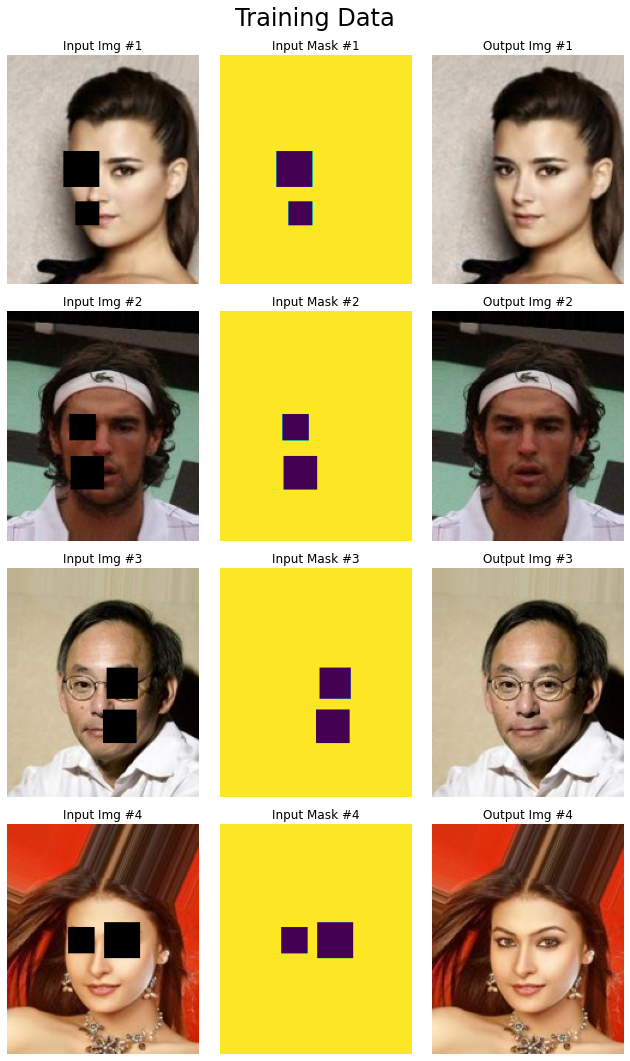

In [10]:
sample_data = train_ds[0]

fig, axes = plt.subplots(4, 3, figsize = (9, 15))

for i in range(4):
    axes[i][0].imshow(sample_data[0][0][i])
    axes[i][0].set_title(f"Input Img #{i + 1}")

    axes[i][1].imshow(sample_data[0][1][i])
    axes[i][1].set_title(f"Input Mask #{i + 1}")

    axes[i][2].imshow(sample_data[1][i])
    axes[i][2].set_title(f"Output Img #{i + 1}")

axes = axes.flatten()

for ax in axes:
    ax.axis(False)
    ax.grid(False)

plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.suptitle("Training Data", fontsize = 24)
plt.show()
